## Notebook 8: Exercise: Model Evaluation 

In this notebook, we get a feel for the general handling of the code. We experiment with different approaches to generate duplicate or similar images.

We also examine the influence of the selected ML model on the interactions between the input features and on our target.  

## Step 1: Imports

More libraries can be implemented here if needed.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.utils import resample

import shap
import xgboost as xgb


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Step 2: Data preparation

We load our data and select the features we need. 
If you want the full feature set, just swap the commantation.   
Our target is called "Fitted Material condition" in the dataset. It is the shape deviation in the observed milling process. 

In [ ]:
# path to csv file
data = pd.read_csv("use_case_modelevaluation.csv.gz", compression="gzip")

# desired plot-size in mm
width_mm = 300  # A4-width
height_mm = 90  # A4-height

# conversion to inches
width_inch = width_mm / 25.4
height_inch = height_mm / 25.4


# determine features and target
# all features
# features_ = ["X-Position", "Y-Position", "side", "Vorschubkraft", "Vorschubnormalkraft", "VorschubCurrent", "VorschubnormalCurrent", "CSV Connector-INORM",
#             "cfc_1","cfc_2","cfc_3", "X", "Y", "Z", "POSF_X", "POSF_Y", "POSF_Z", "Dexelcore: Mean-Dexel-Q_w", "Dexelcore: Mean-Dexel-V_cut", 
#             "Dexelcore: X-Dexel-SpanungsquerschnittHuellkoerper","Dexelcore: Y-Dexel-SpanungsquerschnittHuellkoerper", "Dexelcore: Z-Dexel-SpanungsquerschnittHuellkoerper", "Volumen_kumuliert",
#             "Phi_1","Phi_2","rho_min","rho_max","distance_angle_calc" ]

# selected features
features_=["CSV Connector-INORM", "POSF_X", "POSF_Y", "POSF_Z", "Volumen_kumuliert", "Phi_1", "Phi_2"]

target = "Fitted Material condition"
data_sample = data[data["Block"] == 3] # Optional: all data can also be used

# preparing feature and target data
X = data_sample[features_]
y = data_sample[target]

## Step 3: Pearson-Correlation & Spearman-Correlation

We start with a little analysis of the data. The Pearson correlation examines **linear** relationships, while Spearman recognizes **monotonic nonlinear** correlations.

---

### Exercise: 
Get the figure of the correlation matrix for each feature set. 
Either you change the comment functions or you supplement the code with additional plots.

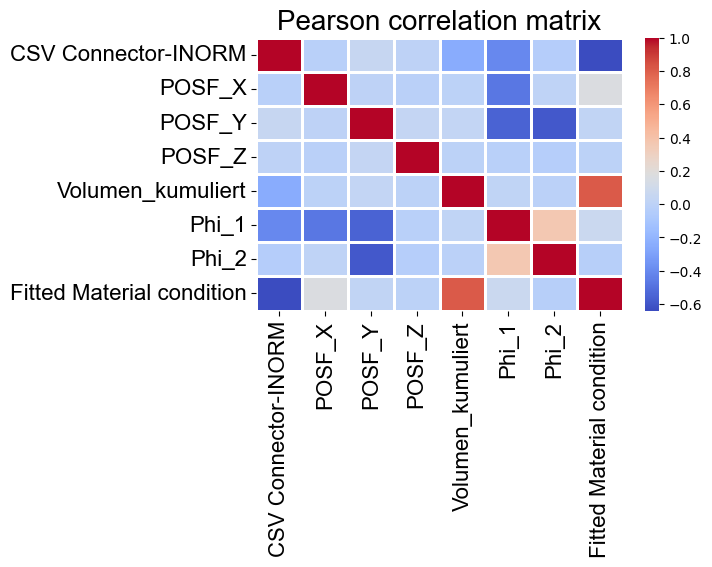

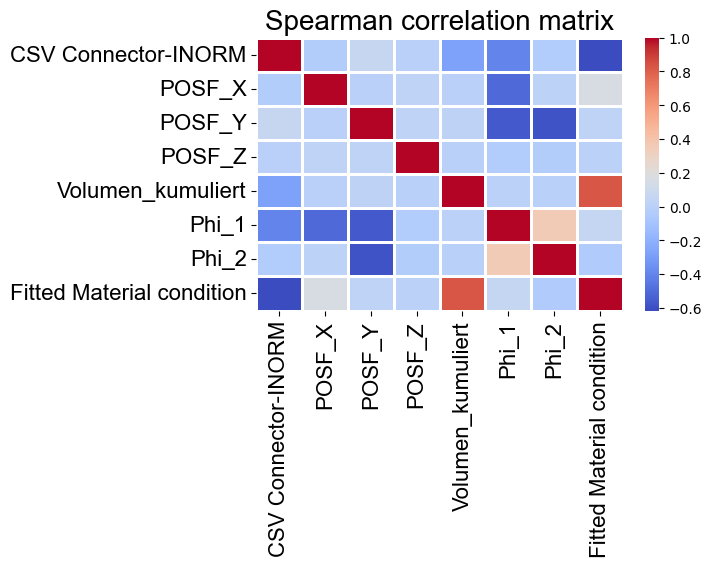

In [ ]:
# -------------------
# Pearson
# -------------------

# all features
# pearson_corr = data_sample[["Vorschubkraft", "Vorschubnormalkraft", "VorschubCurrent", "VorschubnormalCurrent", "CSV Connector-INORM","cfc_1","cfc_2","cfc_3",
#              "Dexelcore: Mean-Dexel-Q_w", "Dexelcore: Mean-Dexel-V_cut", "Dexelcore: X-Dexel-SpanungsquerschnittHuellkoerper","Dexelcore: Y-Dexel-SpanungsquerschnittHuellkoerper", "Dexelcore: Z-Dexel-SpanungsquerschnittHuellkoerper", "Volumen_kumuliert",
#              "Phi_1","Phi_2","rho_min","rho_max","distance_angle_calc", "Fitted Material condition" ]].corr(method='pearson')

# selected features
pearson_corr = data_sample[["CSV Connector-INORM", "POSF_X", "POSF_Y", "POSF_Z", "Volumen_kumuliert", "Phi_1", "Phi_2", "Fitted Material condition"]].corr(method='pearson')

# other selected features
# pearson_corr = data_sample[["Dexelcore: Mean-Dexel-Q_w", "Dexelcore: Mean-Dexel-V_cut", "Volumen_kumuliert", "Vorschubkraft", "Vorschubnormalkraft", "VorschubCurrent", "VorschubnormalCurrent", "CSV Connector-INORM", "cfc_1", "cfc_2", "Fitted Material condition" ]].corr(method='pearson')


# Pearson correlation matrix 
plt.figure(figsize=(width_inch/2, height_inch))
sns.heatmap(pearson_corr, annot=False, cmap='coolwarm', linewidths=1)
plt.title('Pearson correlation matrix', fontsize=20, fontname='Arial')
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()


# ---------------------
# Spearman
# ---------------------

# all features
# spearman_corr = data_sample[["Vorschubkraft", "Vorschubnormalkraft", "VorschubCurrent", "VorschubnormalCurrent", "CSV Connector-INORM","cfc_1","cfc_2","cfc_3",
#              "Dexelcore: Mean-Dexel-Q_w", "Dexelcore: Mean-Dexel-V_cut", "Dexelcore: X-Dexel-SpanungsquerschnittHuellkoerper","Dexelcore: Y-Dexel-SpanungsquerschnittHuellkoerper", "Dexelcore: Z-Dexel-SpanungsquerschnittHuellkoerper", "Volumen_kumuliert",
#              "Phi_1","Phi_2","rho_min","rho_max","distance_angle_calc", "Fitted Material condition" ]].corr(method='spearman')

spearman_corr = data_sample[["CSV Connector-INORM", "POSF_X", "POSF_Y", "POSF_Z", "Volumen_kumuliert", "Phi_1", "Phi_2", "Fitted Material condition"]].corr(method='spearman')

# other selected features
# spearman_corr = data_sample[["Dexelcore: Mean-Dexel-Q_w", "Dexelcore: Mean-Dexel-V_cut", "Volumen_kumuliert", "Vorschubkraft", "Vorschubnormalkraft", "VorschubCurrent", "VorschubnormalCurrent", "CSV Connector-INORM", "cfc_1", "cfc_2", "Fitted Material condition" ]].corr(method='spearman')

# Spearman-Korrelationsmatrix plotten
plt.figure(figsize=(width_inch/2, height_inch))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', linewidths=1)
plt.title('Spearman correlation matrix', fontsize=20, fontname='Arial')
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()


## Step 4: Residual-Plot

Residuals are the difference between the actual and the predicted values.   
The residual plot is used to check how well a regression model fits the data.

---

### Exercise: 
Currently, an XGBoot regression is being examined using the residual plot. Replace the XGBoost model with a random forest and compare the results. 

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecat

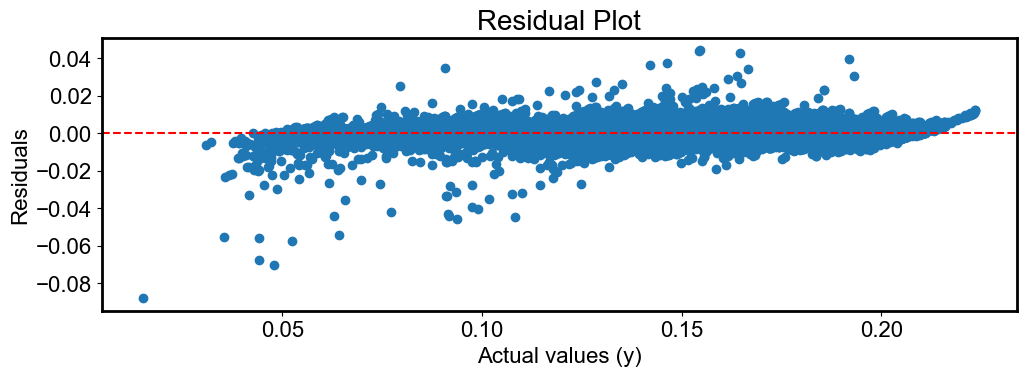

In [8]:
# -------------------
# XGBoost Regression 
# -------------------

model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror'
)

model.fit(X, y)

# prediction
y_pred = model.predict(X)

# calculate residuals
residuals = y - y_pred


# Plot der Residuen

plt.figure(figsize=(width_inch, height_inch))
plt.scatter(y, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot', fontsize=20, fontname='Arial')
plt.xlabel('Actual values (y)', fontsize=16, fontname='Arial')
plt.ylabel('Residuals', fontsize=16, fontname='Arial')
plt.xticks(fontsize=16, fontname='Arial')
plt.yticks(fontsize=16, fontname='Arial')
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.show()


## Step 5: SHAP Analysis (SHapley Additive exPlanations)
SHAP is a game-theoretic approach to explain the output of any machine learning model.      
The core idea of SHAP is based on Shapley values from cooperative game theory. SHAP values quantify how much each feature contribute to the difference between the actual prediction and the average prediction for all instances. 

---

### Exercise: 
Replace XGBoost with Random Forest as in Step 4 and compare the results. Run all SHAP plots with the new ML model. 

In [9]:
# --------------------
# XGBoost Regression
# --------------------

model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror'
)

model.fit(X, y)

# --------------------
# calculate SHAP values
# --------------------
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
100%|===================| 61171/61299 [06:36<00:00]        

### Waterfall Plot

The waterfall plot shows the local influence of features to a single prediction point.  
Hints for the interpretation: 
- The value of the feature in the prediction under consideration is highlighted in gray to the left of the feature.
- The entry in the waterfall plot depends on the SHAP value. This indicates the influence on the prediction.
- The zero line is the predicted value.

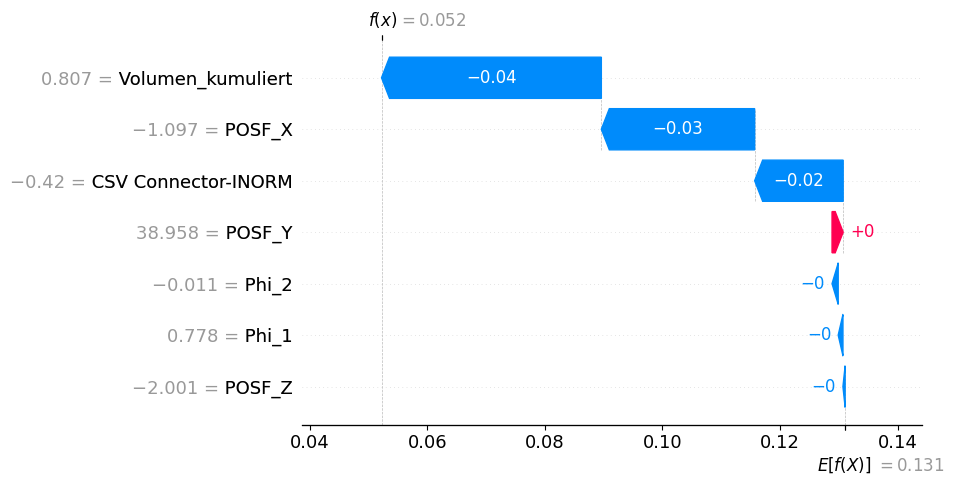

In [11]:
# --------------------
# Waterfall plot 
# --------------------
""" local influence of features for a single point """

# Example: the first sample from the data set
plt.figure()
shap.plots.waterfall(shap_values[0], max_display=28) 
plt.show()

### Feature Importance Plot
The feature importance plot considers all predictions and calculates a global shap value for each feature.  
The averaged SHAP value thus indicates the global or averaged influence of a feature.

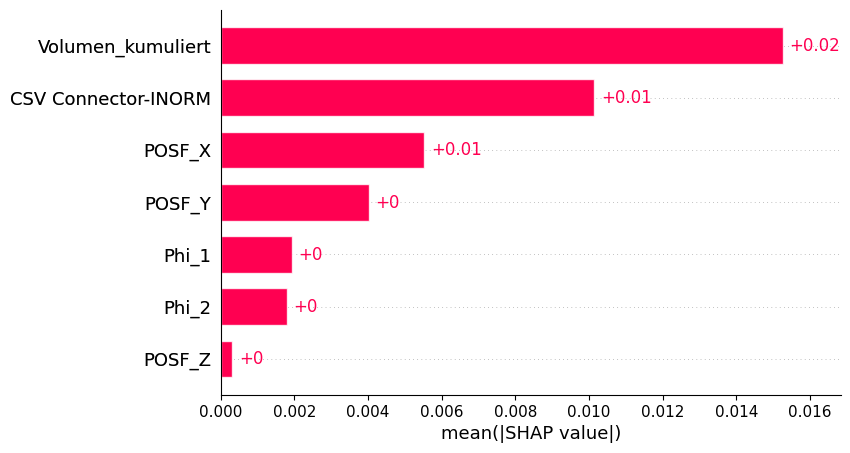

In [12]:
# Feature Importance
""" average absolute SHAP value per feature (global importance) """

shap.plots.bar(shap_values)        
plt.show()

### Beeswarm Plot
The Beeswarm plot shows each local SHAP value for each feature. The color coding indicates whether the actual value of a feature is high or low, and the SHAP value, i.e., the influence on the forecast, can be read on the x-axis.    
Correlations and shifts can be identified. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


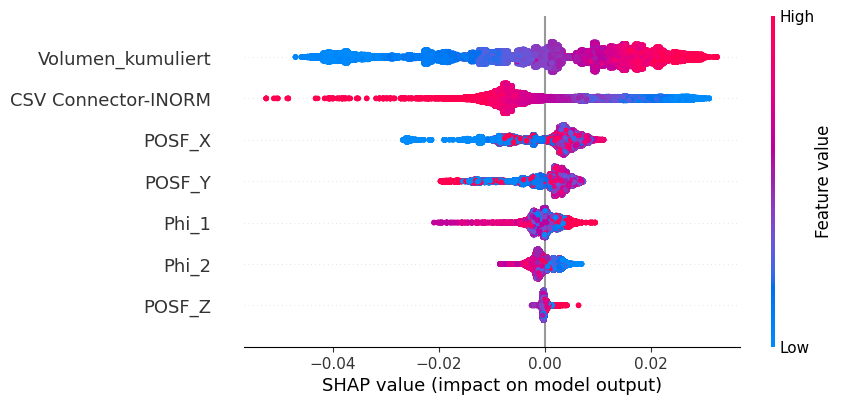

In [13]:
# Beeswarm Plot
""" shows in which direction (positive/negative) a feature typically has an effect and how strongly it varies. """

shap.plots.beeswarm(shap_values)   
plt.show()